In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
TRAIN_DATA = '../data/training.csv'
TEST_DATA = '../data/test.csv'

In [70]:
df_train = pd.read_csv(TRAIN_DATA)
df_test = pd.read_csv(TEST_DATA)

In [71]:
# describe the data
df_train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


There are missing values in a number of the labels. Explore more exactly:

In [72]:
df_train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

See how they occur together

In [73]:
labels = list(df_train.columns.difference(['Image']))
missing_groups_wcounts=(df_train.isnull()
 .groupby(labels)
 .apply(lambda x: np.ma.size(x, axis=1))
 .reset_index(level=labels, name="n_rows")
 .sort_values(by=['n_rows'], ascending=False)
 .reset_index(drop=True)
)
missing_groups_wcounts['Missing_Group_Number']=missing_groups_wcounts.index
missing_groups_wcounts.head(10)

,left_eye_center_x,left_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,...,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,n_rows,Missing_Group_Number
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,4755,0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2140,1
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,31,2
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,26,3
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,13,4
5,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,10,5
6,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,True,6,6
7,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,4,7
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,8
9,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,True,True,True,True,3,9


There are the largest number of cases with the center of the eyes and no other labels. The second largest group contains all the labels. After this there is a scattering of missings that don't make up a large portion of the data. Is there a large difference between images in the first two groups?


In [74]:
df_train['image_number']=df_train.index
df_train

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image,image_number
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...,0
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...,1
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...,2
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...,3
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...,4
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...,5
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,109 109 125 141 145 139 120 81 45 34 31 35 36 ...,6
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,178 177 178 179 179 179 181 185 188 184 192 20...,7
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...,8
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538,226 227 225 224 221 220 215 210 210 208 206 18...,9


In [75]:
# Add the mising group to the images
df_train_wmissgroups = (pd.concat([df_train[labels].isnull(),
                                   df_train[['Image','image_number']]], axis=1
                                   )
                       )

df_train_wmissgroups = pd.merge(df_train_wmissgroups,
          missing_groups_wcounts,
          on=labels
         )

df_train_wmissgroups = pd.concat([df_train_wmissgroups[['Image','Missing_Group_Number','image_number']],
                                  df_train[labels]],axis=1)
df_train_wmissgroups

,Image,Missing_Group_Number,image_number,left_eye_center_x,left_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,left_eyebrow_inner_end_x,...,right_eye_center_x,right_eye_center_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y
0,238 236 237 238 240 240 239 241 241 243 240 23...,1,0,66.033564,39.002274,59.582075,39.647423,73.130346,39.969997,56.953263,...,30.227008,36.421678,36.356571,37.389402,23.452872,37.389402,40.227609,29.002322,16.356379,29.647471
1,219 215 204 196 204 211 212 200 180 168 178 19...,1,1,64.332936,34.970077,58.856170,35.274349,70.722723,36.187166,53.987404,...,29.949277,33.448715,36.034723,34.361532,24.472511,33.144443,42.728851,26.146043,16.865362,27.058860
2,144 142 159 180 188 188 184 180 167 132 84 59 ...,1,2,65.057053,34.909642,59.412000,36.320968,70.984421,36.320968,55.742526,...,30.903789,34.909642,37.678105,36.320968,24.976421,36.603221,42.193895,28.135453,16.791158,32.087116
3,193 192 193 194 194 194 193 192 168 111 50 12 ...,1,3,65.225739,37.261774,60.003339,39.127179,72.314713,38.380967,56.433809,...,32.023096,37.261774,37.618643,38.754115,25.307270,38.007903,41.671513,31.049990,20.458017,29.909343
4,147 148 160 196 215 214 216 217 219 220 206 18...,1,4,66.725301,39.621261,58.565890,39.621261,72.515926,39.884466,57.249571,...,32.244810,38.042032,36.982380,39.094852,22.506110,38.305237,38.035436,30.935382,15.925870,30.672177
5,167 169 170 167 156 145 106 68 52 24 20 15 21 ...,1,5,69.680748,39.968748,62.864299,40.169271,76.898243,41.171888,59.766280,...,29.183551,37.563364,36.401047,39.367626,21.765533,38.565533,39.408000,30.546393,14.949084,32.150131
6,109 109 125 141 145 139 120 81 45 34 31 35 36 ...,1,6,64.131866,34.290040,57.797154,35.154040,69.026577,34.290040,58.661154,...,29.578953,33.138040,34.761664,33.714040,24.108242,33.138040,40.233020,27.091329,19.500886,27.667329
7,178 177 178 179 179 179 181 185 188 184 192 20...,1,7,67.468893,39.413452,59.554951,40.454773,75.591612,40.038245,56.014136,...,29.355961,39.621717,37.478214,40.454773,21.025398,40.038245,39.769165,26.917375,11.861592,31.915806
8,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...,1,8,65.802880,34.755200,58.652160,37.329280,72.952960,35.899520,57.507840,...,27.475840,36.185600,36.342400,37.043200,20.325120,37.615360,36.342400,26.174720,12.888960,31.322880
9,226 227 225 224 221 220 215 210 210 208 206 18...,1,9,64.121231,36.740308,58.620923,37.840615,71.272000,37.290338,56.971077,...,29.468923,38.390154,36.344615,39.490462,22.868308,40.040615,36.619077,29.314769,16.817846,33.990154


In [76]:
Group_0_examples=(df_train_wmissgroups[df_train_wmissgroups['Missing_Group_Number']==0]
 .sample(n=16, random_state=42))

Group_1_examples=(df_train_wmissgroups[df_train_wmissgroups['Missing_Group_Number']==1]
 .sample(n=16, random_state=42))

Other_Group_examples=(df_train_wmissgroups[(df_train_wmissgroups['Missing_Group_Number']!=1) & 
                               (df_train_wmissgroups['Missing_Group_Number']!=0) ]
 .sample(n=16, random_state=42))

In [77]:
print (Group_0_examples)

                                                  Image  Missing_Group_Number  \
3015  14 14 12 12 11 12 13 16 19 21 21 20 17 15 12 1...                     0   
4886  100 99 98 96 93 90 85 79 81 93 102 107 113 118...                     0   
4249  31 34 38 42 45 48 49 50 51 53 55 57 59 63 68 7...                     0   
6322  32 23 22 20 19 21 23 14 7 7 15 26 34 57 89 79 ...                     0   
3781  53 53 53 53 53 48 44 43 46 46 42 35 28 23 18 1...                     0   
6495  116 127 143 148 151 145 132 132 134 126 117 11...                     0   
6336  146 133 88 45 43 41 40 39 39 38 38 37 36 36 36...                     0   
5750  108 104 97 88 79 91 149 157 183 213 208 201 19...                     0   
3413  40 41 42 45 47 47 47 46 45 44 61 67 75 93 124 ...                     0   
6221  238 242 243 233 217 191 171 157 147 125 96 90 ...                     0   
6099  224 230 233 226 206 193 189 159 96 48 43 42 42...                     0   
4609  5 8 14 34 44 41 35 30 

In [79]:
print(df_train[df_train['image_number']==3015])

      left_eye_center_x  left_eye_center_y  right_eye_center_x  \
3015          69.750921          37.816759           31.093784   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
3015           37.480616                      NaN                      NaN   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
3015                      NaN                      NaN   

      right_eye_inner_corner_x  right_eye_inner_corner_y      ...       \
3015                       NaN                       NaN      ...        

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
3015                  NaN                  NaN                   NaN   

      mouth_right_corner_y  mouth_center_top_lip_x  mouth_center_top_lip_y  \
3015                   NaN                     NaN                     NaN   

      mouth_center_bottom_lip_x  mouth_center_bottom_lip_y  \
3015                  44.539745                  83.196919   

                 

In [112]:
def plot_images(examples=None,singlegroup=True):
    """Helpful function to plot images"""
    f, axarr = plt.subplots(4, 4)
    f.set_size_inches(4 * 4, 4 * 4)
    if singlegroup:
        print('Non-Missing Positions in this Group')
        for index, value in examples[labels].iloc[0].iteritems():
            if not np.isnan(value): print(index)
    
    for i, image in enumerate(examples['Image']
                              .apply(lambda x: np.fromstring(x, sep=' ')
                                     .reshape(96,96))):
        axarr[i // 4, i % 4].imshow(image, cmap='gray')

        for x, y in np.reshape(examples[labels].iloc[i].values,(15,2)):
            if not np.isnan(x) and not np.isnan(y):
                axarr[i // 4, i % 4].plot(x, y, 'rx',markersize=6)
    
    plt.show()

Non-Missing Positions in this Group
left_eye_center_x
left_eye_center_y
mouth_center_bottom_lip_x
mouth_center_bottom_lip_y
nose_tip_x
nose_tip_y
right_eye_center_x
right_eye_center_y


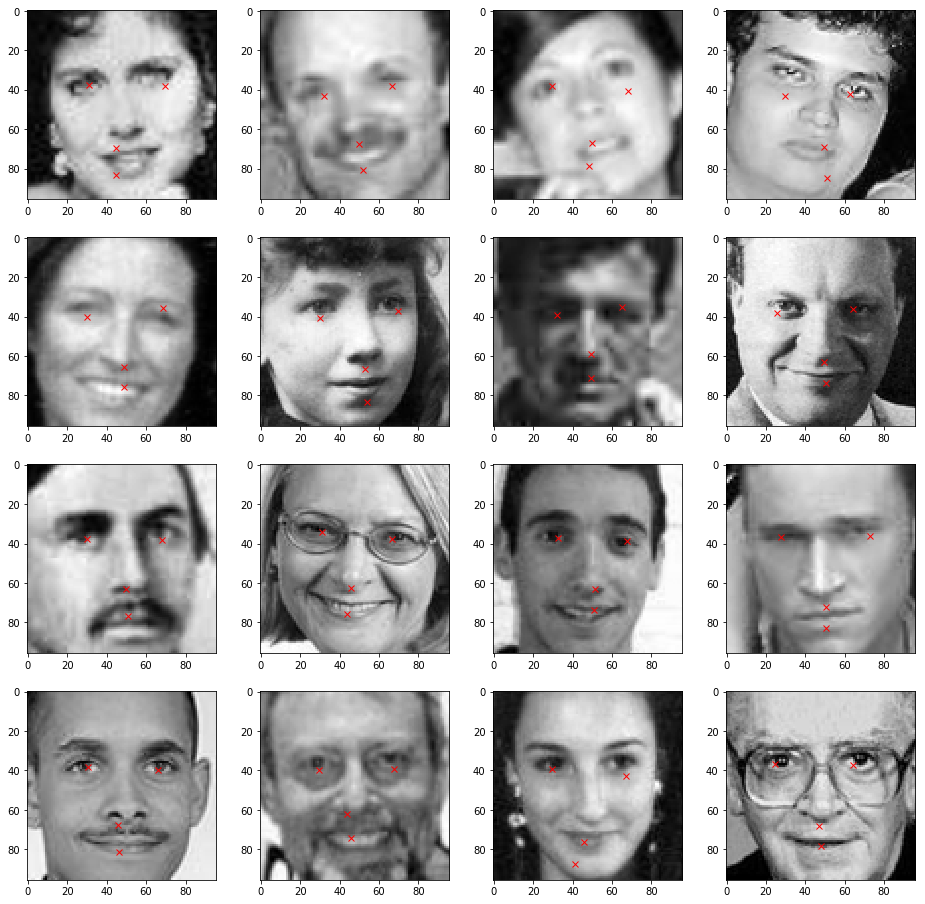

In [113]:
plot_images(examples=Group_0_examples)

Non-Missing Positions in this Group
left_eye_center_x
left_eye_center_y
left_eye_inner_corner_x
left_eye_inner_corner_y
left_eye_outer_corner_x
left_eye_outer_corner_y
left_eyebrow_inner_end_x
left_eyebrow_inner_end_y
left_eyebrow_outer_end_x
left_eyebrow_outer_end_y
mouth_center_bottom_lip_x
mouth_center_bottom_lip_y
mouth_center_top_lip_x
mouth_center_top_lip_y
mouth_left_corner_x
mouth_left_corner_y
mouth_right_corner_x
mouth_right_corner_y
nose_tip_x
nose_tip_y
right_eye_center_x
right_eye_center_y
right_eye_inner_corner_x
right_eye_inner_corner_y
right_eye_outer_corner_x
right_eye_outer_corner_y
right_eyebrow_inner_end_x
right_eyebrow_inner_end_y
right_eyebrow_outer_end_x
right_eyebrow_outer_end_y


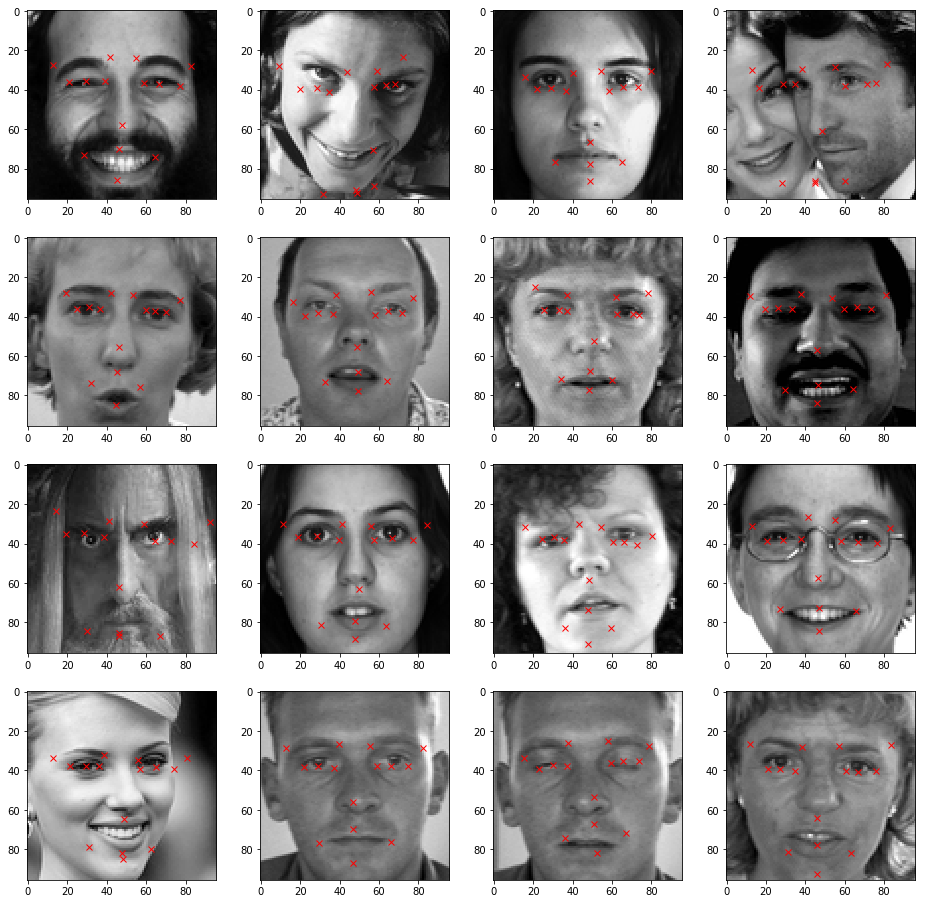

In [60]:
plot_images(examples=Group_1_examples)

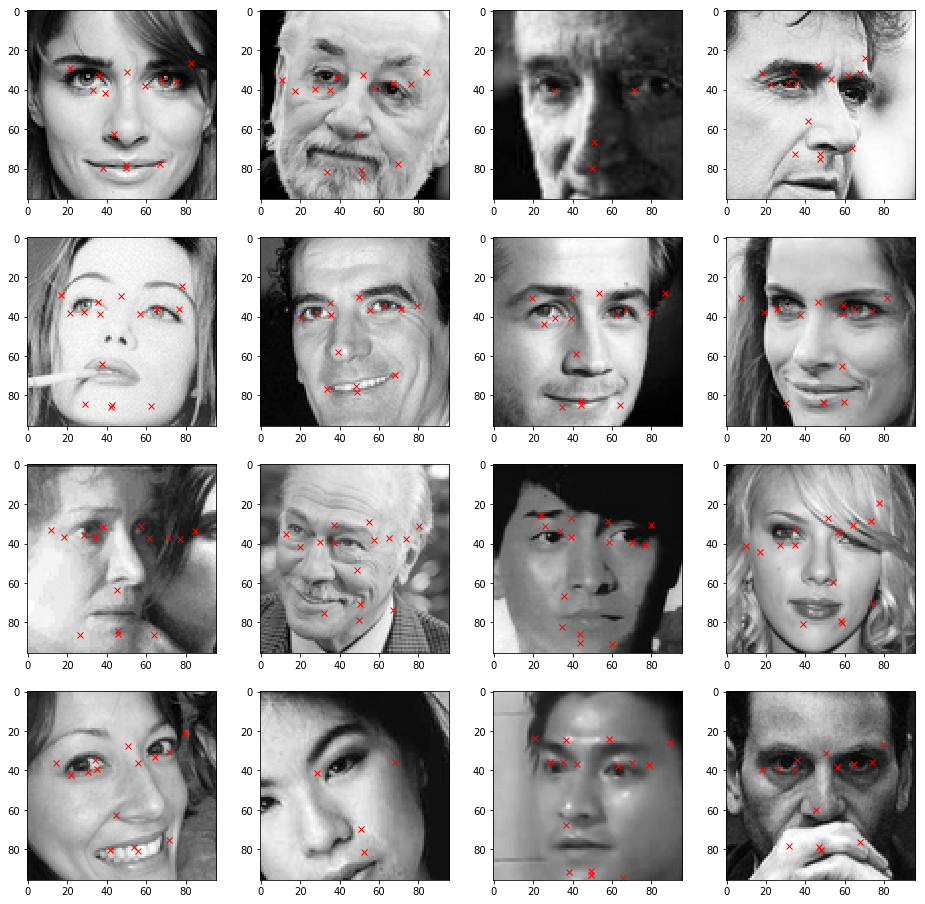

In [63]:
plot_images(examples=Other_Group_examples,singlegroup=False)


In [69]:
test = (df_train.isnull()
 .groupby(labels)
 .apply(lambda x: np.ma.size(x, axis=1))
 .reset_index(level=labels, name="n_rows")
 .sort_values(by=['n_rows'], ascending=False)
 .reset_index(drop=True)
)
test['Missing_Group_Number']=test.index
print(type(test[1:2]))
test[0:2].stack()


<class 'pandas.core.frame.DataFrame'>


0  left_eye_center_x            False
   left_eye_center_y            False
   left_eye_inner_corner_x       True
   left_eye_inner_corner_y       True
   left_eye_outer_corner_x       True
   left_eye_outer_corner_y       True
   left_eyebrow_inner_end_x      True
   left_eyebrow_inner_end_y      True
   left_eyebrow_outer_end_x      True
   left_eyebrow_outer_end_y      True
   mouth_center_bottom_lip_x    False
   mouth_center_bottom_lip_y    False
   mouth_center_top_lip_x        True
   mouth_center_top_lip_y        True
   mouth_left_corner_x           True
   mouth_left_corner_y           True
   mouth_right_corner_x          True
   mouth_right_corner_y          True
   nose_tip_x                   False
   nose_tip_y                   False
   right_eye_center_x           False
   right_eye_center_y           False
   right_eye_inner_corner_x      True
   right_eye_inner_corner_y      True
   right_eye_outer_corner_x      True
   right_eye_outer_corner_y      True
   right_eye

In [ ]:
def isnull_fn(item):
    if item:
        print(item)
        return True
    else:
        return False

In [57]:
test = (df_train.isnull()
 .groupby(labels)
#  .apply(lambda x: np.ma.size(x, axis=1))
#  .reset_index(level=labels, name="n_rows")
#  .sort_values(by=['n_rows'], ascending=False)
#  .reset_index(drop=True)
)
test.groups
#test.get_group(())

{(False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False): Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             2272, 2273, 2274, 2275, 2276, 2277, 2278, 2281, 2282, 2283],
            dtype='int64', length=2140),
 (False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True): Int64Index([1601, 1605, 1647, 1679, 1719, 1721, 1723, 1786, 1805, 1837, 1876,
             1942, 1966, 1967, 1972, 1985, 2077, 2130, 2135, 2191, 2202, 2205,
             2223, 2233, 2279, 2280],
            dtype='int64'),
 (False,
  False,
  False,
  Fals